# 100M band = 80

1
2
3
[False False False ... False False False]


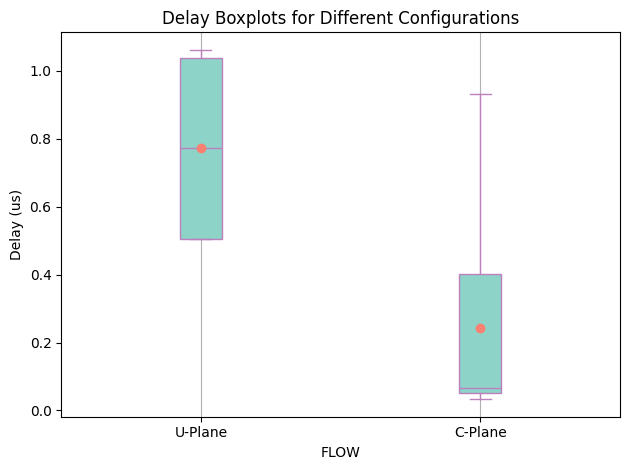

Mean Delay for U-Plane: 0.7720062219918861 us
Mean Delay for C-Plane: 0.24348960130859934 us


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  

# Set a custom color palette
colors = plt.cm.Set3.colors

folder = "./sim_results/PruebaPrio3/"
plt.rcParams["figure.autolayout"] = True


Flow_max_value = 1
RU = 3
Step = 1
configs_txt = ["U-Plane", "C-Plane"]
Flows = np.arange(1, Flow_max_value + Step, Step)
Ru = np.arange(1, RU + Step, Step)
AAUs = np.arange(1, 13, 1)
Nsim = 1
delay = []
delay_aux = [] 
for flow in Flows:
    # Read data into pandas DataFrames
    delay_control = []
    delay_aux = []
    delay_user = []
    if flow == 1:
        for ru in Ru:
            print(ru)
            CTx = pd.read_csv(f"{folder}TxFileControl{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            UTx = pd.read_csv(f"{folder}TxFileUser{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            CRx = pd.read_csv(f"{folder}RxFileControl{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            URx = pd.read_csv(f"{folder}RxFileUser{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])

            # Calculate delay for user and control configurations
            delay_user.append(URx["Time"].values - UTx["Time"].values)
            delay_control.append(CRx["Time"].values - CTx["Time"].values)
            # Assign values to the corresponding columns in the delay DataFrame
            
        delay.append(np.concatenate(delay_user))
        delay.append(np.concatenate(delay_control))
        print(delay_control[0] == 0)
    else: 
        for num in AAUs:
            Tx = pd.read_csv(f"{folder}TxFile{num + 12*flow}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            Rx = pd.read_csv(f"{folder}RxFile{num + 12*flow}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            # Ensure that the length of 'Tx' matches the length of 'Rx'
            min_len = min(len(Tx), len(Rx))
            delay_rt = Rx["Time"].values[:min_len] - Tx["Time"].values[:min_len]

            # Assign values to the corresponding columns in the delay DataFrame
            delay.append(delay_rt)
    

# Boxplot with enhanced style
delay_us = [arr*1e-3 for arr in delay]    
bp = plt.boxplot(
    delay_us,
    labels=configs_txt,
    showmeans=True,
    showfliers=False,
    patch_artist=True,  # fill with color
    boxprops=dict(facecolor=colors[0], color=colors[9]),
    capprops=dict(color=colors[9]),
    whiskerprops=dict(color=colors[9]),
    flierprops=dict(markeredgecolor=colors[9], markerfacecolor=colors[9]),
    medianprops=dict(color=colors[9]),
    meanprops=dict(marker="o", markerfacecolor=colors[3], markeredgecolor=colors[3]),
)

# Customize labels and title
plt.ylabel("Delay (us)")
plt.xlabel("FLOW")
plt.title("Delay Boxplots for Different Configurations")

# Add gridlines
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.grid()
plt.show()

# Extracting mean delay values from the boxplot object
mean_delays = [item.get_ydata()[0] for item in bp['means']]

# Printing mean delay for each configuration
for config, mean_delay in zip(configs_txt, mean_delays):
    print(f"Mean Delay for {config}: {mean_delay} us")




In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  


# plt.plot(delay_us[0][0:200])
plt.stem(delay_us[0], label="U-Plane", linefmt="bo")
# plt.stem(delay_us[1], label="U-Plane", linefmt="go")
# plt.stem(delay_us[1][1200:1500], label="C-Plane", linefmt="go")
plt.legend()
plt.ylabel("Delay (us)")
plt.xlabel("# Pkt")

1
2
[False False False ... False False False]


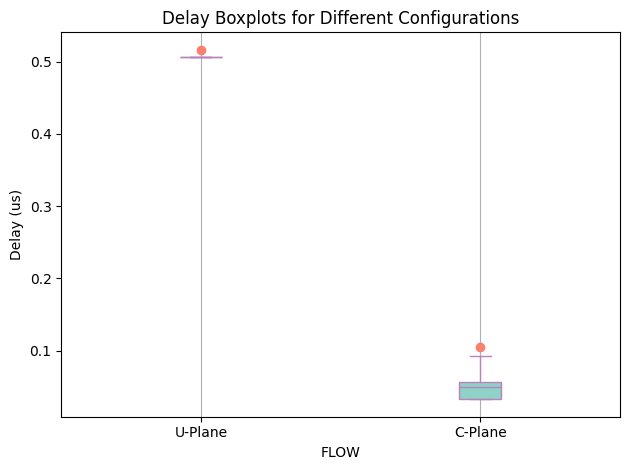

Mean Delay for U-Plane: 0.516250929329256 us
Mean Delay for C-Plane: 0.10562450609153771 us


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  

# Set a custom color palette
colors = plt.cm.Set3.colors

folder = "./sim_results/PruebaPrio2/"
plt.rcParams["figure.autolayout"] = True


Flow_max_value = 1
RU = 2
Step = 1
configs_txt = ["U-Plane", "C-Plane"]
Flows = np.arange(1, Flow_max_value + Step, Step)
Ru = np.arange(1, RU + Step, Step)
AAUs = np.arange(1, 13, 1)
Nsim = 1
delay = []
delay_aux = [] 
fmt=["bo", "go", "yo"]
delay_control = []
delay_user = []
for flow in Flows:
    # Read data into pandas DataFrames
 
    if flow == 1:
        for ru in Ru:
            print(ru)
            CTx = pd.read_csv(f"{folder}TxFileControl{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            UTx = pd.read_csv(f"{folder}TxFileUser{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            CRx = pd.read_csv(f"{folder}RxFileControl{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            URx = pd.read_csv(f"{folder}RxFileUser{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])

            # Calculate delay for user and control configurations
            min_len = min(len(UTx), len(URx))
            delay_user.append(URx["Time"].values[:min_len] - UTx["Time"].values[:min_len])
            min_len = min(len(CTx), len(CRx))
            delay_control.append(CRx["Time"].values[:min_len] - CTx["Time"].values[:min_len])
            # Assign values to the corresponding columns in the delay DataFrame
            
        delay.append(np.concatenate(delay_user))
        delay.append(np.concatenate(delay_control))
        print(delay_control[0] == 0)
    else: 
        delay_rt = []
        for num in AAUs:
            Tx = pd.read_csv(f"{folder}TxFile{num + 12*flow}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            Rx = pd.read_csv(f"{folder}RxFile{num + 12*flow}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            # Ensure that the length of 'Tx' matches the length of 'Rx'
            min_len = min(len(Tx), len(Rx))
            delay_rt.append( Rx["Time"].values[:min_len] - Tx["Time"].values[:min_len])

        # Assign values to the corresponding columns in the delay DataFrame
        delay.append(np.concatenate(delay_rt))
    

# Boxplot with enhanced style
delay_us = [arr*1e-3 for arr in delay]    
bp = plt.boxplot(
    delay_us,
    labels=configs_txt,
    showmeans=True,
    showfliers=False,
    patch_artist=True,  # fill with color
    boxprops=dict(facecolor=colors[0], color=colors[9]),
    capprops=dict(color=colors[9]),
    whiskerprops=dict(color=colors[9]),
    flierprops=dict(markeredgecolor=colors[9], markerfacecolor=colors[9]),
    medianprops=dict(color=colors[9]),
    meanprops=dict(marker="o", markerfacecolor=colors[3], markeredgecolor=colors[3]),
)

# Customize labels and title
plt.ylabel("Delay (us)")
plt.xlabel("FLOW")
plt.title("Delay Boxplots for Different Configurations")

# Add gridlines
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.grid()
plt.show()

# Extracting mean delay values from the boxplot object
mean_delays = [item.get_ydata()[0] for item in bp['means']]

# Printing mean delay for each configuration
for config, mean_delay in zip(configs_txt, mean_delays):
    print(f"Mean Delay for {config}: {mean_delay} us")




No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0, '# Pkt')

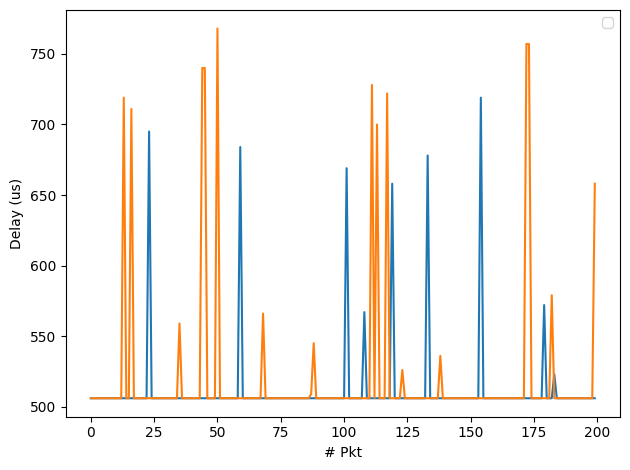

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  


plt.plot(delay_user[0][0:200])
plt.plot(delay_user[1][0:200])

# plt.stem(delay_us[1][1200:1500], label="C-Plane", linefmt="go")
plt.legend()
plt.ylabel("Delay (us)")
plt.xlabel("# Pkt")

Text(0.5, 0, '# Pkt')

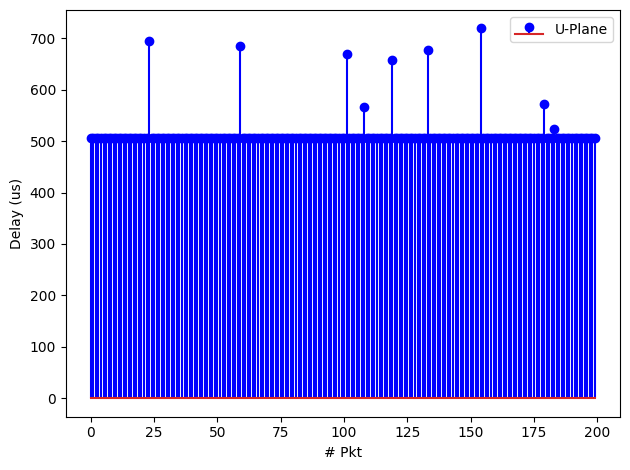

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  


# plt.plot(delay_us[0][0:200])
plt.stem(delay_user[0][0:200], label="U-Plane", linefmt="bo")
# plt.stem(delay_user[1][0:200], label="U-Plane", linefmt="go")
# plt.stem(delay_us[1], label="C-Plane", linefmt="go")
# plt.stem(delay_us[1][1200:1500], label="C-Plane", linefmt="go")
plt.legend()
plt.ylabel("Delay (us)")
plt.xlabel("# Pkt")

1
[False False False ... False False False]


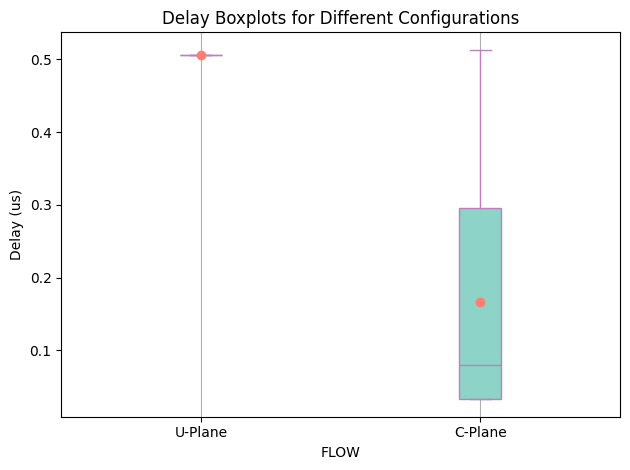

Mean Delay for U-Plane: 0.5060023136072392 us
Mean Delay for C-Plane: 0.1659596910622393 us


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  

# Set a custom color palette
colors = plt.cm.Set3.colors

folder = "./sim_results/PruebaPrio1/"
plt.rcParams["figure.autolayout"] = True


Flow_max_value = 1
RU = 1
Step = 1
configs_txt = ["U-Plane", "C-Plane"]
Flows = np.arange(1, Flow_max_value + Step, Step)
Ru = np.arange(1, RU + Step, Step)
AAUs = np.arange(1, 13, 1)
Nsim = 1
delay = []
delay_aux = [] 
for flow in Flows:
    # Read data into pandas DataFrames
    delay_control = []
    delay_aux = []
    delay_user = []
    if flow == 1:
        for ru in Ru:
            print(ru)
            CTx = pd.read_csv(f"{folder}TxFileControl{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            UTx = pd.read_csv(f"{folder}TxFileUser{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            CRx = pd.read_csv(f"{folder}RxFileControl{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            URx = pd.read_csv(f"{folder}RxFileUser{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])

            # Calculate delay for user and control configurations
            delay_user.append(URx["Time"].values - UTx["Time"].values)
            delay_control.append(CRx["Time"].values - CTx["Time"].values)
            # Assign values to the corresponding columns in the delay DataFrame
            
        delay.append(np.concatenate(delay_user))
        delay.append(np.concatenate(delay_control))
        print(delay_control[0] == 0)
    else: 
        for num in AAUs:
            Tx = pd.read_csv(f"{folder}TxFile{num + 12*flow}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            Rx = pd.read_csv(f"{folder}RxFile{num + 12*flow}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            # Ensure that the length of 'Tx' matches the length of 'Rx'
            min_len = min(len(Tx), len(Rx))
            delay_rt = Rx["Time"].values[:min_len] - Tx["Time"].values[:min_len]

            # Assign values to the corresponding columns in the delay DataFrame
            delay.append(delay_rt)
    

# Boxplot with enhanced style
delay_us = [arr*1e-3 for arr in delay]    
bp = plt.boxplot(
    delay_us,
    labels=configs_txt,
    showmeans=True,
    showfliers=False,
    patch_artist=True,  # fill with color
    boxprops=dict(facecolor=colors[0], color=colors[9]),
    capprops=dict(color=colors[9]),
    whiskerprops=dict(color=colors[9]),
    flierprops=dict(markeredgecolor=colors[9], markerfacecolor=colors[9]),
    medianprops=dict(color=colors[9]),
    meanprops=dict(marker="o", markerfacecolor=colors[3], markeredgecolor=colors[3]),
)

# Customize labels and title
plt.ylabel("Delay (us)")
plt.xlabel("FLOW")
plt.title("Delay Boxplots for Different Configurations")

# Add gridlines
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.grid()
plt.show()

# Extracting mean delay values from the boxplot object
mean_delays = [item.get_ydata()[0] for item in bp['means']]

# Printing mean delay for each configuration
for config, mean_delay in zip(configs_txt, mean_delays):
    print(f"Mean Delay for {config}: {mean_delay} us")




Text(0.5, 0, '# Pkt')

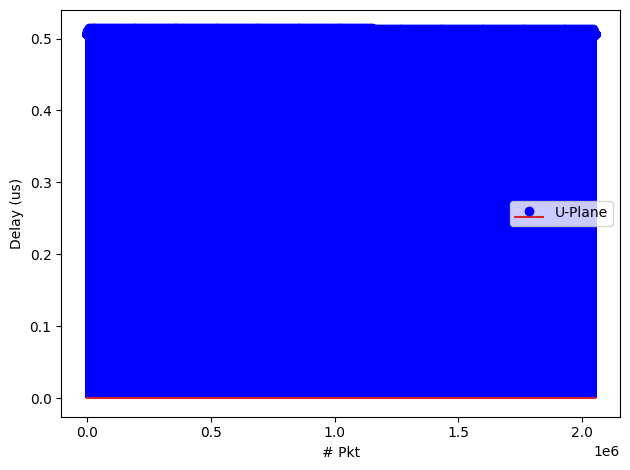

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  


# plt.plot(delay_us[0][0:200])
plt.stem(delay_us[0], label="U-Plane", linefmt="bo")
# plt.stem(delay_us[1][1200:1500], label="C-Plane", linefmt="go")
plt.legend()
plt.ylabel("Delay (us)")
plt.xlabel("# Pkt")

1
2
3
[False False False ... False False False]


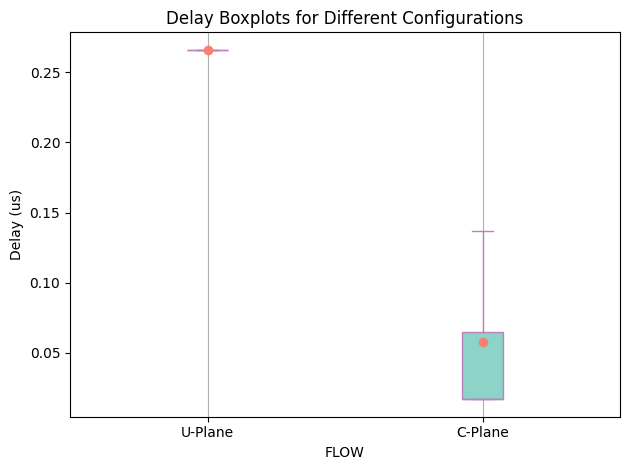

Mean Delay for U-Plane: 0.26600978244561185 us
Mean Delay for C-Plane: 0.05758390831059997 us


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  

# Set a custom color palette
colors = plt.cm.Set3.colors

folder = "./sim_results/prueba1/"
plt.rcParams["figure.autolayout"] = True


Flow_max_value = 1
RU = 3
Step = 1
configs_txt = ["U-Plane", "C-Plane", "RT1"]
Flows = np.arange(1, Flow_max_value + Step, Step)
Ru = np.arange(1, RU + Step, Step)
AAUs = np.arange(1, 13, 1)
Nsim = 1
delay = []
delay_aux = [] 
for flow in Flows:
    # Read data into pandas DataFrames
    delay_control = []
    delay_aux = []
    delay_user = []
    if flow == 1:
        for ru in Ru:
            print(ru)
            CTx = pd.read_csv(f"{folder}TxFileControl{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            UTx = pd.read_csv(f"{folder}TxFileUser{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            CRx = pd.read_csv(f"{folder}RxFileControl{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            URx = pd.read_csv(f"{folder}RxFileUser{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])

            # Calculate delay for user and control configurations
            delay_user.append(URx["Time"].values - UTx["Time"].values)
            delay_control.append(CRx["Time"].values - CTx["Time"].values)
            # Assign values to the corresponding columns in the delay DataFrame
            
        delay.append(np.concatenate(delay_user))
        delay.append(np.concatenate(delay_control))
        print(delay_control[0] == 0)
    else: 
        for num in AAUs:
            Tx = pd.read_csv(f"{folder}TxFile{num + 12*flow}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            Rx = pd.read_csv(f"{folder}RxFile{num + 12*flow}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            # Ensure that the length of 'Tx' matches the length of 'Rx'
            min_len = min(len(Tx), len(Rx))
            delay_rt = Rx["Time"].values[:min_len] - Tx["Time"].values[:min_len]

            # Assign values to the corresponding columns in the delay DataFrame
            delay.append(delay_rt)
    

# Boxplot with enhanced style
delay_us = [arr*1e-3 for arr in delay]    
bp = plt.boxplot(
    delay_us,
    labels=configs_txt,
    showmeans=True,
    showfliers=False,
    patch_artist=True,  # fill with color
    boxprops=dict(facecolor=colors[0], color=colors[9]),
    capprops=dict(color=colors[9]),
    whiskerprops=dict(color=colors[9]),
    flierprops=dict(markeredgecolor=colors[9], markerfacecolor=colors[9]),
    medianprops=dict(color=colors[9]),
    meanprops=dict(marker="o", markerfacecolor=colors[3], markeredgecolor=colors[3]),
)

# Customize labels and title
plt.ylabel("Delay (us)")
plt.xlabel("FLOW")
plt.title("Delay Boxplots for Different Configurations")

# Add gridlines
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.grid()
plt.show()

# Extracting mean delay values from the boxplot object
mean_delays = [item.get_ydata()[0] for item in bp['means']]

# Printing mean delay for each configuration
for config, mean_delay in zip(configs_txt, mean_delays):
    print(f"Mean Delay for {config}: {mean_delay} us")




Text(0.5, 0, '# Pkt')

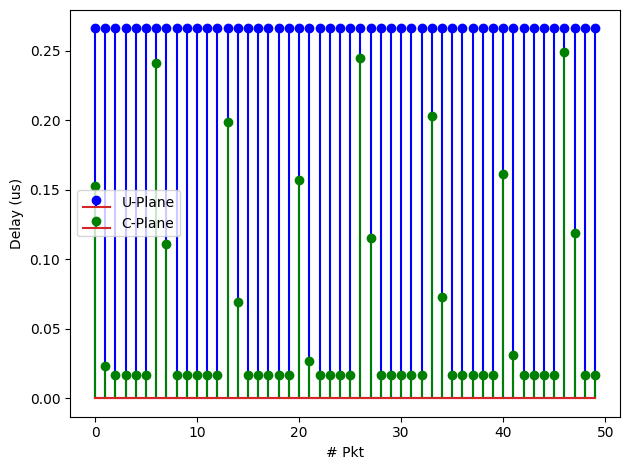

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  


# plt.plot(delay_us[0][0:200])
plt.stem(delay_us[0][0:50], label="U-Plane", linefmt="bo")
plt.stem(delay_us[1][0:50], label="C-Plane", linefmt="go")
plt.legend()
plt.ylabel("Delay (us)")
plt.xlabel("# Pkt")

1
2
3
[False False False ... False False False]


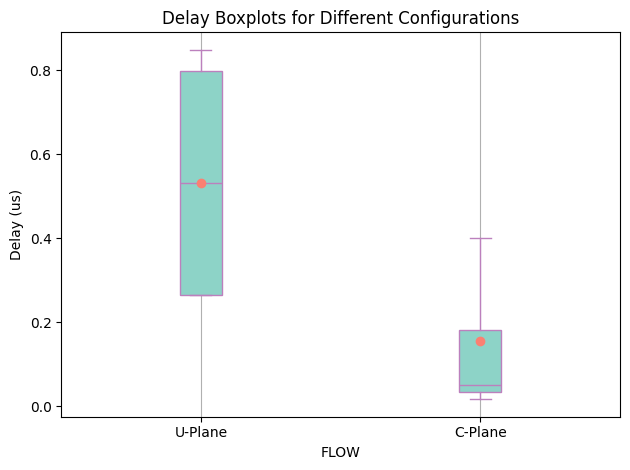

Mean Delay for U-Plane: 0.532027572940045 us
Mean Delay for C-Plane: 0.15620362381363248 us


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  

# Set a custom color palette
colors = plt.cm.Set3.colors

folder = "./sim_results/Pruebas/prueba3/"
plt.rcParams["figure.autolayout"] = True


Flow_max_value = 1
RU = 3
Step = 1
configs_txt = ["U-Plane", "C-Plane"]
Flows = np.arange(1, Flow_max_value + Step, Step)
Ru = np.arange(1, RU + Step, Step)
AAUs = np.arange(1, 13, 1)
Nsim = 1
delay = []
delay_aux = [] 
for flow in Flows:
    # Read data into pandas DataFrames
    delay_control = []
    delay_aux = []
    delay_user = []
    if flow == 1:
        for ru in Ru:
            print(ru)
            CTx = pd.read_csv(f"{folder}TxFileControl{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            UTx = pd.read_csv(f"{folder}TxFileUser{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            CRx = pd.read_csv(f"{folder}RxFileControl{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            URx = pd.read_csv(f"{folder}RxFileUser{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])

            # Calculate delay for user and control configurations
            delay_user.append(URx["Time"].values - UTx["Time"].values)
            delay_control.append(CRx["Time"].values - CTx["Time"].values)
            # Assign values to the corresponding columns in the delay DataFrame
            
        delay.append(np.concatenate(delay_user))
        delay.append(np.concatenate(delay_control))
        print(delay_control[0] == 0)
    else: 
        for num in AAUs:
            Tx = pd.read_csv(f"{folder}TxFile{num + 12*flow}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            Rx = pd.read_csv(f"{folder}RxFile{num + 12*flow}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            # Ensure that the length of 'Tx' matches the length of 'Rx'
            min_len = min(len(Tx), len(Rx))
            delay_rt = Rx["Time"].values[:min_len] - Tx["Time"].values[:min_len]

            # Assign values to the corresponding columns in the delay DataFrame
            delay.append(delay_rt)
    

# Boxplot with enhanced style
delay_us = [arr*1e-3 for arr in delay]    
bp = plt.boxplot(
    delay_us,
    labels=configs_txt,
    showmeans=True,
    showfliers=False,
    patch_artist=True,  # fill with color
    boxprops=dict(facecolor=colors[0], color=colors[9]),
    capprops=dict(color=colors[9]),
    whiskerprops=dict(color=colors[9]),
    flierprops=dict(markeredgecolor=colors[9], markerfacecolor=colors[9]),
    medianprops=dict(color=colors[9]),
    meanprops=dict(marker="o", markerfacecolor=colors[3], markeredgecolor=colors[3]),
)

# Customize labels and title
plt.ylabel("Delay (us)")
plt.xlabel("FLOW")
plt.title("Delay Boxplots for Different Configurations")

# Add gridlines
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.grid()
plt.show()

# Extracting mean delay values from the boxplot object
mean_delays = [item.get_ydata()[0] for item in bp['means']]

# Printing mean delay for each configuration
for config, mean_delay in zip(configs_txt, mean_delays):
    print(f"Mean Delay for {config}: {mean_delay} us")




In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  


# plt.plot(delay_us[0][0:200])
plt.stem(delay_us[0], label="U-Plane", linefmt="bo")
plt.stem(delay_us[1], label="C-Plane", linefmt="go")
plt.legend()
plt.ylabel("Delay (us)")
plt.xlabel("# Pkt")

: 

1
2
3
[False False False ... False False False]


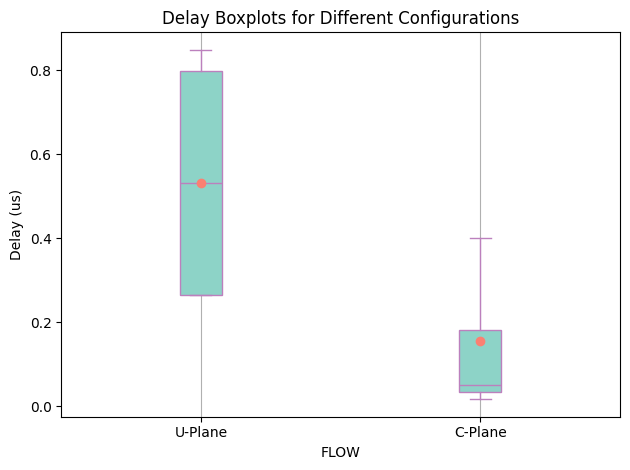

Mean Delay for U-Plane: 0.532027572940045 us
Mean Delay for C-Plane: 0.15620362381363248 us


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  

# Set a custom color palette
colors = plt.cm.Set3.colors

folder = "./sim_results/prueba1/"
plt.rcParams["figure.autolayout"] = True


Flow_max_value = 1
RU = 3
Step = 1
configs_txt = ["U-Plane", "C-Plane"]
Flows = np.arange(1, Flow_max_value + Step, Step)
Ru = np.arange(1, RU + Step, Step)
AAUs = np.arange(1, 13, 1)
Nsim = 1
delay = []
delay_aux = [] 
for flow in Flows:
    # Read data into pandas DataFrames
    delay_control = []
    delay_aux = []
    delay_user = []
    if flow == 1:
        for ru in Ru:
            print(ru)
            CTx = pd.read_csv(f"{folder}TxFileControl{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            UTx = pd.read_csv(f"{folder}TxFileUser{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            CRx = pd.read_csv(f"{folder}RxFileControl{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            URx = pd.read_csv(f"{folder}RxFileUser{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])

            # Calculate delay for user and control configurations
            delay_user.append(URx["Time"].values - UTx["Time"].values)
            delay_control.append(CRx["Time"].values - CTx["Time"].values)
            # Assign values to the corresponding columns in the delay DataFrame
            
        delay.append(np.concatenate(delay_user))
        delay.append(np.concatenate(delay_control))
        print(delay_control[0] == 0)
    else: 
        for num in AAUs:
            Tx = pd.read_csv(f"{folder}TxFile{num + 12*flow}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            Rx = pd.read_csv(f"{folder}RxFile{num + 12*flow}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            # Ensure that the length of 'Tx' matches the length of 'Rx'
            min_len = min(len(Tx), len(Rx))
            delay_rt = Rx["Time"].values[:min_len] - Tx["Time"].values[:min_len]

            # Assign values to the corresponding columns in the delay DataFrame
            delay.append(delay_rt)
    

# Boxplot with enhanced style
delay_us = [arr*1e-3 for arr in delay]    
bp = plt.boxplot(
    delay_us,
    labels=configs_txt,
    showmeans=True,
    showfliers=False,
    patch_artist=True,  # fill with color
    boxprops=dict(facecolor=colors[0], color=colors[9]),
    capprops=dict(color=colors[9]),
    whiskerprops=dict(color=colors[9]),
    flierprops=dict(markeredgecolor=colors[9], markerfacecolor=colors[9]),
    medianprops=dict(color=colors[9]),
    meanprops=dict(marker="o", markerfacecolor=colors[3], markeredgecolor=colors[3]),
)

# Customize labels and title
plt.ylabel("Delay (us)")
plt.xlabel("FLOW")
plt.title("Delay Boxplots for Different Configurations")

# Add gridlines
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.grid()
plt.show()

# Extracting mean delay values from the boxplot object
mean_delays = [item.get_ydata()[0] for item in bp['means']]

# Printing mean delay for each configuration
for config, mean_delay in zip(configs_txt, mean_delays):
    print(f"Mean Delay for {config}: {mean_delay} us")




Text(0.5, 0, '# Pkt')

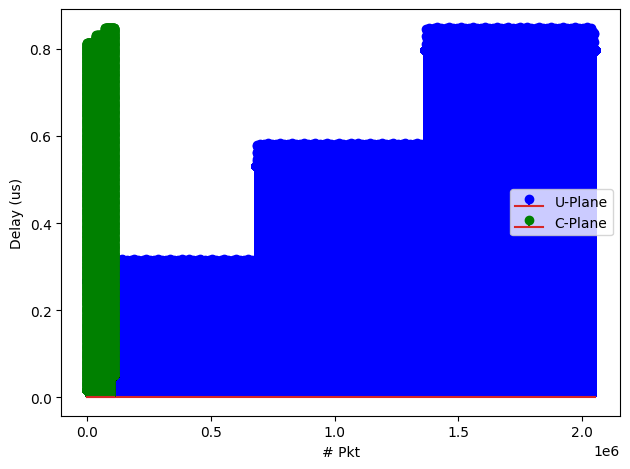

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  


# plt.plot(delay_us[0][0:200])
plt.stem(delay_us[0], label="U-Plane", linefmt="bo")
plt.stem(delay_us[1], label="C-Plane", linefmt="go")
plt.legend()
plt.ylabel("Delay (us)")
plt.xlabel("# Pkt")

1
2
3
[False False False ... False False False]


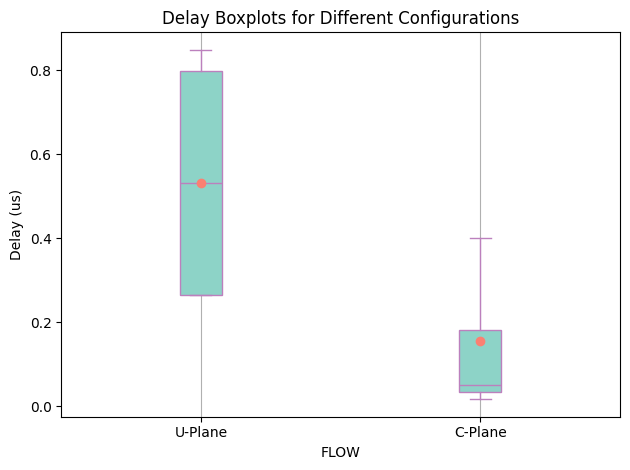

Mean Delay for U-Plane: 0.5320276264597649 us
Mean Delay for C-Plane: 0.15619055173629476 us


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  

# Set a custom color palette
colors = plt.cm.Set3.colors

folder = "./sim_results/prueba3/"
plt.rcParams["figure.autolayout"] = True


Flow_max_value = 1
RU = 3
Step = 1
configs_txt = ["U-Plane", "C-Plane"]
Flows = np.arange(1, Flow_max_value + Step, Step)
Ru = np.arange(1, RU + Step, Step)
AAUs = np.arange(1, 13, 1)
Nsim = 1
delay = []
delay_aux = [] 
for flow in Flows:
    # Read data into pandas DataFrames
    delay_control = []
    delay_aux = []
    delay_user = []
    if flow == 1:
        for ru in Ru:
            print(ru)
            CTx = pd.read_csv(f"{folder}TxFileControl{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            UTx = pd.read_csv(f"{folder}TxFileUser{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            CRx = pd.read_csv(f"{folder}RxFileControl{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            URx = pd.read_csv(f"{folder}RxFileUser{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])

           # Calculate delay for user and control configurations
            min_len = min(len(UTx), len(URx))
            delay_user.append(URx["Time"].values[:min_len] - UTx["Time"].values[:min_len])
            min_len = min(len(CTx), len(CRx))
            delay_control.append(CRx["Time"].values[:min_len] - CTx["Time"].values[:min_len])
            
        delay.append(np.concatenate(delay_user))
        delay.append(np.concatenate(delay_control))
        print(delay_control[0] == 0)
    else: 
        for num in AAUs:
            Tx = pd.read_csv(f"{folder}TxFile{num + 12*flow}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            Rx = pd.read_csv(f"{folder}RxFile{num + 12*flow}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            # Ensure that the length of 'Tx' matches the length of 'Rx'
            min_len = min(len(Tx), len(Rx))
            delay_rt = Rx["Time"].values[:min_len] - Tx["Time"].values[:min_len]

            # Assign values to the corresponding columns in the delay DataFrame
            delay.append(delay_rt)
    

# Boxplot with enhanced style
delay_us = [arr*1e-3 for arr in delay]    
bp = plt.boxplot(
    delay_us,
    labels=configs_txt,
    showmeans=True,
    showfliers=False,
    patch_artist=True,  # fill with color
    boxprops=dict(facecolor=colors[0], color=colors[9]),
    capprops=dict(color=colors[9]),
    whiskerprops=dict(color=colors[9]),
    flierprops=dict(markeredgecolor=colors[9], markerfacecolor=colors[9]),
    medianprops=dict(color=colors[9]),
    meanprops=dict(marker="o", markerfacecolor=colors[3], markeredgecolor=colors[3]),
)

# Customize labels and title
plt.ylabel("Delay (us)")
plt.xlabel("FLOW")
plt.title("Delay Boxplots for Different Configurations")

# Add gridlines
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.grid()
plt.show()

# Extracting mean delay values from the boxplot object
mean_delays = [item.get_ydata()[0] for item in bp['means']]

# Printing mean delay for each configuration
for config, mean_delay in zip(configs_txt, mean_delays):
    print(f"Mean Delay for {config}: {mean_delay} us")




Text(0.5, 0, '# Pkt')

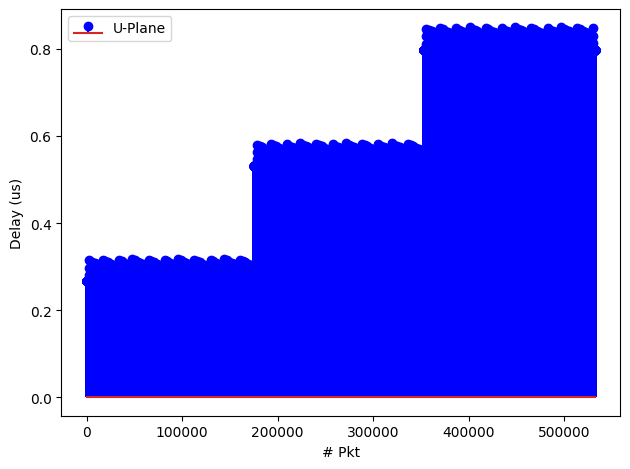

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  


# plt.plot(delay_us[0][0:200])
plt.stem(delay_us[0], label="U-Plane", linefmt="bo")
# plt.stem(delay_us[1], label="C-Plane", linefmt="go")
plt.legend()
plt.ylabel("Delay (us)")
plt.xlabel("# Pkt")

In [14]:
lambda_arrival = (4.5*1e9/8)/(1464+28)

service_time = ((1464+28)*8)/(45*1e9)
print(lambda_arrival)
print(service_time)
rho  = lambda_arrival/service_time

print(rho)



377010.7238605898
2.652444444444444e-07
1421370859058.8591


1
2
3
[False False False ... False False False]


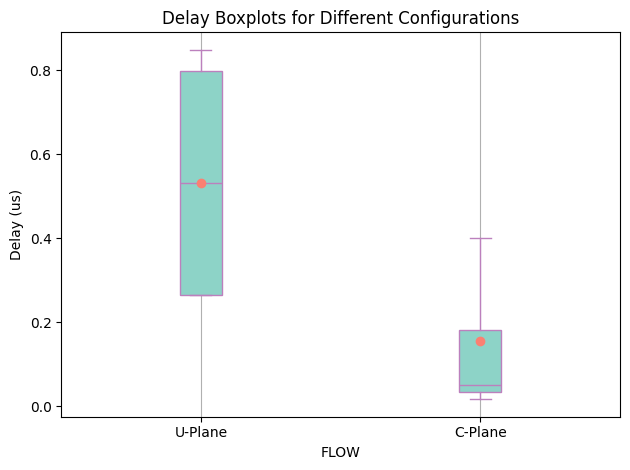

Mean Delay for U-Plane: 0.5320276264597649 us
Mean Delay for C-Plane: 0.15619055173629476 us


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  

# Set a custom color palette
colors = plt.cm.Set3.colors

folder = "./sim_results/prueba3/"
plt.rcParams["figure.autolayout"] = True


Flow_max_value = 1
RU = 3
Step = 1
configs_txt = ["U-Plane", "C-Plane"]
Flows = np.arange(1, Flow_max_value + Step, Step)
Ru = np.arange(1, RU + Step, Step)
AAUs = np.arange(1, 13, 1)
Nsim = 1
delay = []
delay_aux = [] 
for flow in Flows:
    # Read data into pandas DataFrames
    delay_control = []
    delay_aux = []
    delay_user = []
    if flow == 1:
        for ru in Ru:
            print(ru)
            CTx = pd.read_csv(f"{folder}TxFileControl{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            UTx = pd.read_csv(f"{folder}TxFileUser{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            CRx = pd.read_csv(f"{folder}RxFileControl{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            URx = pd.read_csv(f"{folder}RxFileUser{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])

           # Calculate delay for user and control configurations
            min_len = min(len(UTx), len(URx))
            delay_user.append(URx["Time"].values[:min_len] - UTx["Time"].values[:min_len])
            min_len = min(len(CTx), len(CRx))
            delay_control.append(CRx["Time"].values[:min_len] - CTx["Time"].values[:min_len])
            
        delay.append(np.concatenate(delay_user))
        delay.append(np.concatenate(delay_control))
        print(delay_control[0] == 0)
    else: 
        for num in AAUs:
            Tx = pd.read_csv(f"{folder}TxFile{num + 12*flow}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            Rx = pd.read_csv(f"{folder}RxFile{num + 12*flow}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            # Ensure that the length of 'Tx' matches the length of 'Rx'
            min_len = min(len(Tx), len(Rx))
            delay_rt = Rx["Time"].values[:min_len] - Tx["Time"].values[:min_len]

            # Assign values to the corresponding columns in the delay DataFrame
            delay.append(delay_rt)
    

# Boxplot with enhanced style
delay_us = [arr*1e-3 for arr in delay]    
bp = plt.boxplot(
    delay_us,
    labels=configs_txt,
    showmeans=True,
    showfliers=False,
    patch_artist=True,  # fill with color
    boxprops=dict(facecolor=colors[0], color=colors[9]),
    capprops=dict(color=colors[9]),
    whiskerprops=dict(color=colors[9]),
    flierprops=dict(markeredgecolor=colors[9], markerfacecolor=colors[9]),
    medianprops=dict(color=colors[9]),
    meanprops=dict(marker="o", markerfacecolor=colors[3], markeredgecolor=colors[3]),
)

# Customize labels and title
plt.ylabel("Delay (us)")
plt.xlabel("FLOW")
plt.title("Delay Boxplots for Different Configurations")

# Add gridlines
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.grid()
plt.show()

# Extracting mean delay values from the boxplot object
mean_delays = [item.get_ydata()[0] for item in bp['means']]

# Printing mean delay for each configuration
for config, mean_delay in zip(configs_txt, mean_delays):
    print(f"Mean Delay for {config}: {mean_delay} us")




Text(0.5, 0, '# Pkt')

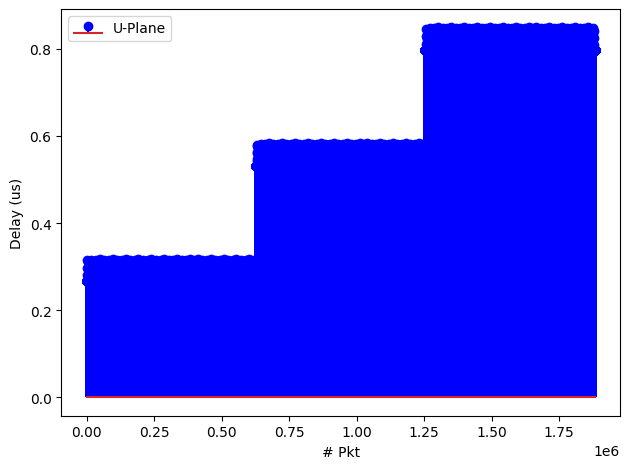

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  


# plt.plot(delay_us[0][0:200])
plt.stem(delay_us[0], label="U-Plane", linefmt="bo")
# plt.stem(delay_us[1], label="C-Plane", linefmt="go")
plt.legend()
plt.ylabel("Delay (us)")
plt.xlabel("# Pkt")

Text(0.5, 0, '# Pkt')

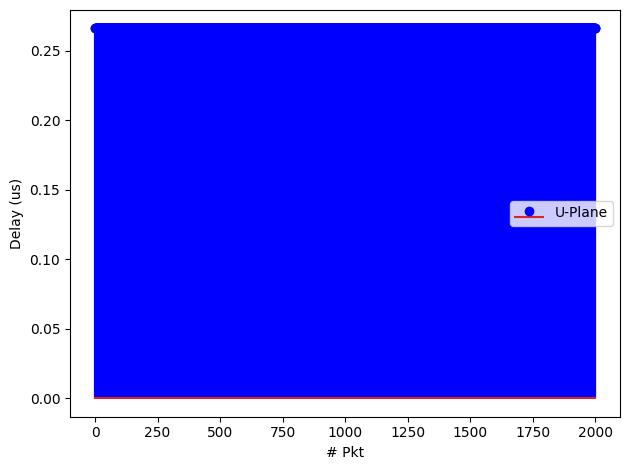

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  


# plt.plot(delay_us[0][0:200])
plt.stem(delay_us[0][200000:2000100], label="U-Plane", linefmt="bo")
# plt.stem(delay_us[1], label="C-Plane", linefmt="go")
plt.legend()
plt.ylabel("Delay (us)")
plt.xlabel("# Pkt")